# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
import sys
!{sys.executable} -m pip install citipy

    100% |████████████████████████████████| 563kB 6.5MB/s ta 0:00:01
  Running setup.py bdist_wheel for citipy ... done
  Stored in directory: /Users/birzavictor/Library/Caches/pip/wheels/6f/07/0d/0392639cf1c10376f59decd06775c0e085ca2458c6036c1028
Successfully built citipy
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import random


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"



## Generate Cities List

In [10]:
# Get random longitude
lon = np.random.uniform (low=-1.8, high=1.8, size=(2000)) * 100

# Get random Latitude
lat = np.random.uniform (low=-0.9, high=0.9, size=(2000)) * 100

# Combine random latitude and longitude coordinates
coordinates = np.stack((lat, lon), axis=-1)

In [13]:
# Create cities data frame
cities_raw = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities_raw.append(citipy.nearest_city(lat, lon))
    
dup_items = set()
cities = []
for x in cities_raw:
    if x not in dup_items:
        cities.append(x)
        dup_items.add(x)
    
print(len(cities))

741


In [14]:
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = "48e3ae93dc88f01b3a7989b36e47e8fd"
units = "Imperial"

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
# set up lists to hold reponse info
ow_date = []
ow_city = []
ow_country = []
ow_cloud = []
ow_humid = []
ow_lat = []
ow_lon = []
ow_maxtmp = []
ow_wind = []

x = 1
    
# Build query URL
for city in cities:
    
   
    name = city.city_name
    print("Retreiving data for City #"+ str(x) + " of " + str((len(cities))) + " ... "  + name )
    
    query_url = url + "appid=" + api_key + "&q=" + name + "&units=" + units
    print(query_url)
    print(50 * "-")
    
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
   
    # Catch wrong city name exception
    try:
   
        ow_date.append(weather_json['dt'])
        ow_city.append(weather_json['name'])
        ow_country.append(weather_json['sys']['country'])
        ow_lat.append(weather_json['coord']['lat'])
        ow_lon.append(weather_json['coord']['lon'])
        ow_maxtmp.append(weather_json['main']['temp_max'])
        ow_humid.append(weather_json['main']['humidity'])
        ow_cloud.append(weather_json['clouds']['all'])
        ow_wind.append(weather_json['wind']['speed'])
        
        x = x + 1
            
    except:
             print("Oops! That was a wrong city name. Try again...")
             print(50 * "-")
            
   
    # Timer to pause for a second after each record - not too exceed 60 API calls per minute limit
    time.sleep(1)

Retreiving data for City #1 of 741 ... hobart
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=hobart&units=Imperial
--------------------------------------------------
Retreiving data for City #2 of 741 ... ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=ribeira grande&units=Imperial
--------------------------------------------------
Retreiving data for City #3 of 741 ... barentsburg
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=barentsburg&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #3 of 741 ... norman wells
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=norman wells&units=Imperial
--------------------------------------------------
Retreiving data for City #4 of 741 .

Retreiving data for City #34 of 741 ... wakkanai
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=wakkanai&units=Imperial
--------------------------------------------------
Retreiving data for City #35 of 741 ... moose factory
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=moose factory&units=Imperial
--------------------------------------------------
Retreiving data for City #36 of 741 ... rudsar
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=rudsar&units=Imperial
--------------------------------------------------
Retreiving data for City #37 of 741 ... saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=saskylakh&units=Imperial
--------------------------------------------------
Retreiving data for City #38 of 741 ... hamilton
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=hamilto

Retreiving data for City #67 of 741 ... port hawkesbury
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=port hawkesbury&units=Imperial
--------------------------------------------------
Retreiving data for City #68 of 741 ... nguru
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=nguru&units=Imperial
--------------------------------------------------
Retreiving data for City #69 of 741 ... torbay
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=torbay&units=Imperial
--------------------------------------------------
Retreiving data for City #70 of 741 ... malmesbury
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=malmesbury&units=Imperial
--------------------------------------------------
Retreiving data for City #71 of 741 ... dingle
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=dingle&un

Retreiving data for City #102 of 741 ... clemency
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=clemency&units=Imperial
--------------------------------------------------
Retreiving data for City #103 of 741 ... leningradskiy
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=leningradskiy&units=Imperial
--------------------------------------------------
Retreiving data for City #104 of 741 ... zeya
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=zeya&units=Imperial
--------------------------------------------------
Retreiving data for City #105 of 741 ... sorland
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=sorland&units=Imperial
--------------------------------------------------
Retreiving data for City #106 of 741 ... shawnee
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=shawnee&uni

Retreiving data for City #136 of 741 ... chagda
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=chagda&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #136 of 741 ... los corrales de buelna
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=los corrales de buelna&units=Imperial
--------------------------------------------------
Retreiving data for City #137 of 741 ... bara
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=bara&units=Imperial
--------------------------------------------------
Retreiving data for City #138 of 741 ... new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=new norfolk&units=Imperial
--------------------------------------------------
Retreiving data for City #13

Retreiving data for City #166 of 741 ... omboue
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=omboue&units=Imperial
--------------------------------------------------
Retreiving data for City #167 of 741 ... tarpon springs
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=tarpon springs&units=Imperial
--------------------------------------------------
Retreiving data for City #168 of 741 ... maralal
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=maralal&units=Imperial
--------------------------------------------------
Retreiving data for City #169 of 741 ... fortuna
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=fortuna&units=Imperial
--------------------------------------------------
Retreiving data for City #170 of 741 ... evensk
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=evensk&u

Retreiving data for City #199 of 741 ... chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=chokurdakh&units=Imperial
--------------------------------------------------
Retreiving data for City #200 of 741 ... uyuni
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=uyuni&units=Imperial
--------------------------------------------------
Retreiving data for City #201 of 741 ... martapura
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=martapura&units=Imperial
--------------------------------------------------
Retreiving data for City #202 of 741 ... changying
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=changying&units=Imperial
--------------------------------------------------
Retreiving data for City #203 of 741 ... meulaboh
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=meulaboh

Retreiving data for City #233 of 741 ... presidencia roque saenz pena
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=presidencia roque saenz pena&units=Imperial
--------------------------------------------------
Retreiving data for City #234 of 741 ... nishihara
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=nishihara&units=Imperial
--------------------------------------------------
Retreiving data for City #235 of 741 ... niigata
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=niigata&units=Imperial
--------------------------------------------------
Retreiving data for City #236 of 741 ... kuopio
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=kuopio&units=Imperial
--------------------------------------------------
Retreiving data for City #237 of 741 ... kotli loharan
http://api.openweathermap.org/data/2.5/weather?appid=48e3

Retreiving data for City #264 of 741 ... haines junction
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=haines junction&units=Imperial
--------------------------------------------------
Retreiving data for City #265 of 741 ... roebourne
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=roebourne&units=Imperial
--------------------------------------------------
Retreiving data for City #266 of 741 ... mugur-aksy
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=mugur-aksy&units=Imperial
--------------------------------------------------
Retreiving data for City #267 of 741 ... sandwick
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=sandwick&units=Imperial
--------------------------------------------------
Retreiving data for City #268 of 741 ... hambantota
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b

Retreiving data for City #300 of 741 ... krasnoye
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=krasnoye&units=Imperial
--------------------------------------------------
Retreiving data for City #301 of 741 ... viligili
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=viligili&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #301 of 741 ... brikama
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=brikama&units=Imperial
--------------------------------------------------
Retreiving data for City #302 of 741 ... port-cartier
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=port-cartier&units=Imperial
--------------------------------------------------
Retreiving data for City #303 of 741 ... has

Retreiving data for City #331 of 741 ... havelock
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=havelock&units=Imperial
--------------------------------------------------
Retreiving data for City #332 of 741 ... senovo
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=senovo&units=Imperial
--------------------------------------------------
Retreiving data for City #333 of 741 ... saldanha
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=saldanha&units=Imperial
--------------------------------------------------
Retreiving data for City #334 of 741 ... te anau
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=te anau&units=Imperial
--------------------------------------------------
Retreiving data for City #335 of 741 ... gberia fotombu
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=gberia fot

Retreiving data for City #370 of 741 ... dong hoi
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=dong hoi&units=Imperial
--------------------------------------------------
Retreiving data for City #371 of 741 ... angoche
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=angoche&units=Imperial
--------------------------------------------------
Retreiving data for City #372 of 741 ... cabedelo
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=cabedelo&units=Imperial
--------------------------------------------------
Retreiving data for City #373 of 741 ... katsuura
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=katsuura&units=Imperial
--------------------------------------------------
Retreiving data for City #374 of 741 ... douglas
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=douglas&units

Retreiving data for City #401 of 741 ... laguna
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=laguna&units=Imperial
--------------------------------------------------
Retreiving data for City #402 of 741 ... soyo
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=soyo&units=Imperial
--------------------------------------------------
Retreiving data for City #403 of 741 ... wahiawa
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=wahiawa&units=Imperial
--------------------------------------------------
Retreiving data for City #404 of 741 ... esmeraldas
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=esmeraldas&units=Imperial
--------------------------------------------------
Retreiving data for City #405 of 741 ... sabaudia
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=sabaudia&units=Imper

Retreiving data for City #436 of 741 ... esperance
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=esperance&units=Imperial
--------------------------------------------------
Retreiving data for City #437 of 741 ... bonavista
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=bonavista&units=Imperial
--------------------------------------------------
Retreiving data for City #438 of 741 ... dauphin
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=dauphin&units=Imperial
--------------------------------------------------
Retreiving data for City #439 of 741 ... christchurch
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=christchurch&units=Imperial
--------------------------------------------------
Retreiving data for City #440 of 741 ... margate
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=m

Retreiving data for City #469 of 741 ... biak
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=biak&units=Imperial
--------------------------------------------------
Retreiving data for City #470 of 741 ... minab
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=minab&units=Imperial
--------------------------------------------------
Retreiving data for City #471 of 741 ... kichera
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=kichera&units=Imperial
--------------------------------------------------
Retreiving data for City #472 of 741 ... motygino
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=motygino&units=Imperial
--------------------------------------------------
Retreiving data for City #473 of 741 ... ixtapa
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=ixtapa&units=Imperial
------

Retreiving data for City #504 of 741 ... kizema
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=kizema&units=Imperial
--------------------------------------------------
Retreiving data for City #505 of 741 ... pionerskiy
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=pionerskiy&units=Imperial
--------------------------------------------------
Retreiving data for City #506 of 741 ... sumbawa
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=sumbawa&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #506 of 741 ... meyungs
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=meyungs&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
-------

Retreiving data for City #538 of 741 ... tanggulangin
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=tanggulangin&units=Imperial
--------------------------------------------------
Retreiving data for City #539 of 741 ... strezhevoy
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=strezhevoy&units=Imperial
--------------------------------------------------
Retreiving data for City #540 of 741 ... ambilobe
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=ambilobe&units=Imperial
--------------------------------------------------
Retreiving data for City #541 of 741 ... ushtobe
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=ushtobe&units=Imperial
--------------------------------------------------
Retreiving data for City #542 of 741 ... praia da vitoria
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e4

Retreiving data for City #571 of 741 ... tekeli
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=tekeli&units=Imperial
--------------------------------------------------
Retreiving data for City #572 of 741 ... rumphi
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=rumphi&units=Imperial
--------------------------------------------------
Retreiving data for City #573 of 741 ... mehamn
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=mehamn&units=Imperial
--------------------------------------------------
Retreiving data for City #574 of 741 ... rock sound
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=rock sound&units=Imperial
--------------------------------------------------
Retreiving data for City #575 of 741 ... kununurra
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=kununurra&units=I

Retreiving data for City #605 of 741 ... tshikapa
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=tshikapa&units=Imperial
--------------------------------------------------
Retreiving data for City #606 of 741 ... uglegorsk
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=uglegorsk&units=Imperial
--------------------------------------------------
Retreiving data for City #607 of 741 ... santiago
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=santiago&units=Imperial
--------------------------------------------------
Retreiving data for City #608 of 741 ... grand centre
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=grand centre&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #608 of 741 ...

Retreiving data for City #641 of 741 ... arawa
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=arawa&units=Imperial
--------------------------------------------------
Retreiving data for City #642 of 741 ... tartagal
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=tartagal&units=Imperial
--------------------------------------------------
Retreiving data for City #643 of 741 ... navahrudak
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=navahrudak&units=Imperial
--------------------------------------------------
Retreiving data for City #644 of 741 ... praia
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=praia&units=Imperial
--------------------------------------------------
Retreiving data for City #645 of 741 ... tahoua
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=tahoua&units=Imperia

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# create a data frame from retreived weather data
weather_dict = {
    "Date": ow_date,
    "City": ow_city,
    "Country": ow_country,
    "Latitude": ow_lat,
    "Longitude": ow_lon,
    "MaxTemp": ow_maxtmp,
    "Humidity": ow_humid,
    "Cloudiness": ow_cloud,
    "Wind Speed": ow_wind
}


weather_data = pd.DataFrame(weather_dict)

# Remove duplicates
weather_data = weather_data.drop_duplicates(["City"], keep ='first')

weather_data.head(10)

,Date,City,Country,Latitude,Longitude,MaxTemp,Humidity,Cloudiness,Wind Speed
0,1546813800,Hobart,AU,-42.88,147.33,62.60,48,40,6.93
1,1546812000,Ribeira Grande,PT,38.52,-28.70,62.60,88,40,20.80
2,1546812000,Norman Wells,CA,65.28,-126.83,-13.01,75,20,6.93
3,1546815195,Tevriz,RU,57.51,72.40,11.13,78,68,8.16
4,1546812000,Ushuaia,AR,-54.81,-68.31,46.40,80,40,32.21
5,1546815197,Atuona,PF,-9.80,-139.03,79.67,100,36,12.86
6,1546814100,Yazoo City,US,32.86,-90.41,68.00,37,1,5.82
7,1546815200,Birao,CF,10.30,22.78,73.05,39,0,11.97
8,1546815201,East London,ZA,-33.02,27.91,69.14,100,0,7.61
9,1546814950,Mataura,NZ,-46.19,168.86,65.85,64,48,16.89


In [17]:
weather_data.count()

Date          668
City          668
Country       668
Latitude      668
Longitude     668
MaxTemp       668
Humidity      668
Cloudiness    668
Wind Speed    668
dtype: int64

In [18]:
# Save csv file
weather_data.to_csv("Weather_Data.csv", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

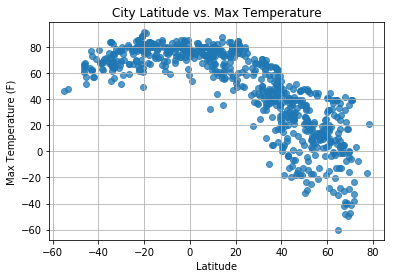

In [19]:

# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"],weather_data["MaxTemp"], marker="o", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("LatVTemp.png")
plt.show()



#### Latitude vs. Humidity Plot

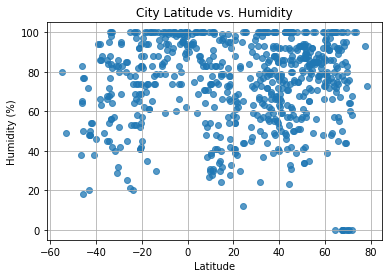

In [20]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"],weather_data["Humidity"], marker="o", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("LatVHum.png")
plt.show()


#### Latitude vs. Cloudiness Plot

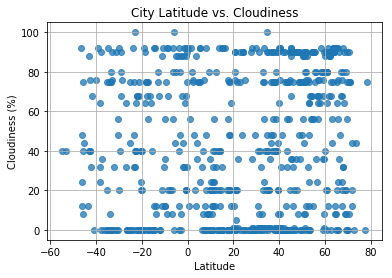

In [21]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"],weather_data["Cloudiness"], marker="o", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("LatVCloud.png")
plt.show()


#### Latitude vs. Wind Speed Plot

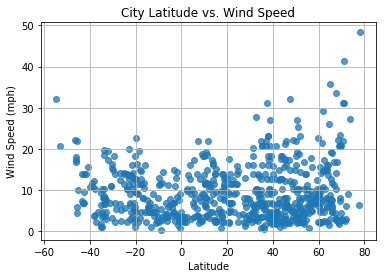

In [22]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"],weather_data["Wind Speed"], marker="o", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("LatVWind.png")
plt.show()

